**Given Data:**<br/>
The data set to be used for the exercises given below is the following sample set comprising a
two-class problem for classes c1 and c2 .
- c1 = [(1; 6); (7; 2); (8; 9); (9; 9); (4; 8); (8; 5)]
- c2 = [(2; 1); (3; 3); (2; 4); (7; 1); (1; 3); (5; 2)]

Throughout the assignment c1 is considered as -ve class and c2 is considered as +ve class

### Imports Required for the entire assignment

In [254]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import time

### Dataset variables and target

In [255]:
dataSet = np.array([[1, 6],[7, 2],[8, 9],[9, 9],[4, 8],[8, 5],[2, 1],[3, 3],[2, 4],[7, 1],[1, 3],[5, 2]])
target = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

### A. Is this dataset linearly separable? Take a smaller subset (2 data points from each class) and hand-draw the feasible region of solution (where weight vector W * resides) for this smaller subset. [Hint: Subtract the class-mean from these vectors to plot the homogeneous solution].

For this, let us draw a graph that clearly distinguishes between the two classes c1 and c2. <br/>
**Note :** 
- c1 is represenetd using <span style="color:blue">BLUE</span>(Circle)
- c2 is represented by <span style="color:red">RED</span>(Cross)

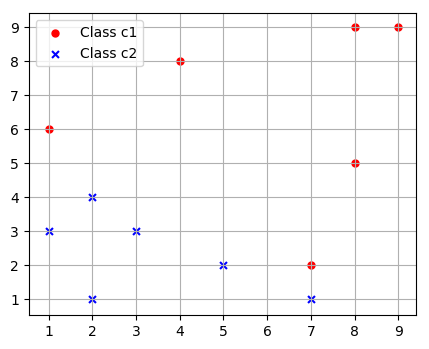

In [256]:
x1=dataSet[:6,0]
x2=dataSet[6:,0]
y1=dataSet[:6,1]
y2=dataSet[6:,1]

plt.figure(num=None, figsize=(5, 4), dpi=100, facecolor='w', edgecolor='k') 
plt.scatter(x1,y1,label="Class c1",color='r',s=25,marker="o")
plt.scatter(x2,y2,label="Class c2",color='b',s=25,marker="x")
plt.grid()
plt.legend()

Below is the common program that implements all the Threshold, LMS and Sigmoid based on the value given in "funtion" global variable. This is done to avoid code repetition.<br/>

Now let us take a look at what each and every function does in the below code.

### 1) Perceptron Class: 
   This a class that creates a Perceptron object with the following default properties
    
**Perceptron Initializations:<br/>**
Number of epochs = 5000,<br/>
Learning rate:
- Threshold : 1
- Widrow Hoff :
    - Linear Data set : 0.001
    - Non Linear Data Set : 0.0001
- Sigmoid :
    - Linear Data set : 0.05
    - Non Linear Data Set : 0.001
    
Weights=[0,0,0].


**Important Functions:**
- <b><u>activationFunction: </u></b>
    * Threshold : returns f(x)= 1 when x>=0 0 otherwise
    * Sigmoid : returns $
        \begin{align}
        f(x)=1/(1+{e}^{-x})
        \end{align}
        $

    * LMS : returns $
        \begin{align}
        f(x)=x
        \end{align}
        $
- <b><u>prediction:</u></b> returns the activationFunction(dot product of weights and inputs)
- <b><u>updateFunction:</u></b> perform weight updates
    * Threshold : weight = weight + $\eta * x$ 
    * Sigmoid : weight = weight + $\eta * error * x$ 
    * LMS : weight = weight + $\eta * error * derivative * x$ [Derivative = 1 Since $f(x)=x$ ]
    
### 2) calculateWeights Function:
**InputParaments:**
- initialWeights - These weights are used as initial weights in creating perceptron
- initialBatchWeights - These weights are used as initial weights in creating perceptron for Batch Updtae mode
- operation - Tells if the perceptron being built is Threshold or Widrow Hoff or Sigmoid
- calcTime - It is boolean value that tells to print the time taken for execution. Used in problem D
- typeOfData - Tells if the data is "Non Linear"(problem F) or None(for rest of the problems)

**Return Value:**
Returns the perceptron developed using the input parameters with the updated weights


### 3) findDecisionBoundary Function:
**Input Parameters:**
- weights
**Return Value:**
- Decision Boundary that can be drawn with the given weights


## Observations:

1) ***Perceptron with threshold activation function:***
 - Converges very quickly when compared to Widrow Hoff and  Sigmoid
 - Learning rate can be kept higher than the other two algorithms
 - Number of epochs taken to converge is 31
 
2) ***Perceptron with Widrow-Hoff or Least Mean Squared (LMS) Learning Rule:***
 - Slowest of the all the algorithms
 - requires the lowest learning rate.
 - Increase in the learning rate does not give expected output
 - Number of epochs taken to converger is throughout the epochs
 - Zero error is not obtained
 
3) ***Perceptron with Sigmoid Activation Function:***
 - Takes in moderate learning rate
 - Number of epochs taken to converge is 1616
 - Slower than basic perceptron learning rule but faster than LMS
 
 
### Stopping Criteria:
The algorithms are stopped when we achieve zero error continuously for 10 times in a row.

In [257]:
function="" 
initialWeights=np.array([])
initialBatchWeights=np.array([])

class Perceptron(object):
    def __init__(self,weights,typeOfData,inputSize,numberOfPatterns,numberOfEpochs=5000):
        self.numberOfEpochs=numberOfEpochs
        self.typeOfData=typeOfData
        self.epochsTaken=0
        if function=="Threshold":
            self.learningRate=1
        elif function=="Sigmoid":
            if typeOfData=="Non Linear":
                self.learningRate=0.001
            else:
                self.learningRate=0.05
        if function=="LMS":
            if typeOfData=="Non Linear":
                self.learningRate=0.0001
            else:
                self.learningRate=0.001
        
        if weights.size==0:
            self.weights=np.zeros(1+inputSize)
        else:
            self.weights=weights
        
    def getClass(self,val):
        if(function=="LMS"):
            return "c1" if val>=0 else "c2"
        if(val<=0.3):
            return "c2"
        elif(val>=0.7):
            return "c1"
        elif(val<=0.5):
            return "c1"
        else:
            return "c2"

    def activationFunction(self,x):
        if function=="Threshold":
            return 1 if x>=0 else 0
        elif function=="Sigmoid": 
            return 1/(1+math.exp(-x))
        elif function =="LMS":
            if x<=-0.7:
                return -1
            elif x>=-0.3 and x<=0.3:
                return 0
            elif x>=0.7:
                return 1            
            return x
        
    def prediction(self,x):
        dotProduct=self.weights.T.dot(x)
        return self.activationFunction(dotProduct)
    
    def updateFunction(self,dataSet,target):
        count=prev=curr=0
        arr=np.array([],dtype=int)
        for ep in range(self.numberOfEpochs):
            errorTrack=np.ones(dataSet.shape[0])
            er=np.zeros(dataSet.shape[0])
            for i in range(dataSet.shape[0]):
                inputWithBiasX=np.insert(dataSet[i],0,1)
                expected=self.prediction(inputWithBiasX)
                error=target[i]-expected
                targetClass=self.getClass(target[i])
                expectedClass=self.getClass(expected)
                errorTrack[i]=0 if targetClass == expectedClass else 1
                if function=="LMS":
                    er[i]=error**2
                    derivative=1
                    if abs(error)>=0.5:
                        self.weights=(self.weights + self.learningRate*error*derivative*inputWithBiasX)
                else:
                    er[i]=error
                    self.weights=self.weights + self.learningRate*error*inputWithBiasX
            if(self.typeOfData=="Non Linear"):
                avgError=er.sum()/(dataSet.shape[0])
                avgError= avgError if function=="Sigmoid" else avgError/2
                if((avgError<0.45 and function=="LMS") or (abs(avgError)<=0.005 and function=="Sigmoid")):
                    print(function,"Epochs Taken",ep,sep=" : ",end=", "
                    print("Updated Wieghts",self.weights,sep=" : ")
                    self.epochsTaken=ep
                    break
            else:
                if(errorTrack.any()==False):
                    curr=ep
                    arr=np.append(arr,ep)
                    if(prev==curr-1):
                        count+=1
                        if(count==10):
                            diff=np.ediff1d(arr)
                            if((np.unique(diff).shape[0])==1 and diff[1]==1):
                                self.epochsTaken=ep
                                break
                            else:
                                count=0
                                arr=np.array([],dtype=int)
                    prev=curr
            self.epochsTaken=ep
                    
                    
def calculateWeights(initialWeights,operation,calcTime,typeOfData):
    global function,target
    function=operation
    if(operation=="Threshold" or operation=="Sigmoid"):
        target = np.array([0,0,0,0,0,0,1,1,1,1,1,1])
    else:
        target = np.array([-1,-1,-1,-1,-1,-1,1,1,1,1,1,1])
        
    perceptron = Perceptron(initialWeights,typeOfData,inputSize=dataSet.shape[1],numberOfPatterns=dataSet.shape[0])
    startTime=time.time()
    perceptron.updateFunction(dataSet, target)
    time1=time.time() - startTime
    if(calcTime):
        print(initialWeights if initialWeights.size!=0 else np.zeros(3,dtype=int),end="\t")
        op=function if function!="Threshold" else "BTU"
        if initialWeights.size==0:
            print("",end="\t")
        print("%s\t%.3f\t%d" % (op,time1,perceptron.epochsTaken))
    return perceptron

def findDecisionBoundary(weights):
    x = np.linspace(0, 20, 2000)
    bias=weights[0]
    w1=weights[1]
    w2=weights[2]
    xIntercept=-bias/w1
    yIntercept=-bias/w2
    slope=-(bias/w2)/(bias/w1)
    return slope*x+yIntercept


SyntaxError: invalid syntax (<ipython-input-257-0f12a8d34e53>, line 84)

# 1. Perceptron with threshold activation function

Updated Weights :  [26. -3. -4.], Epochs Taken :  45


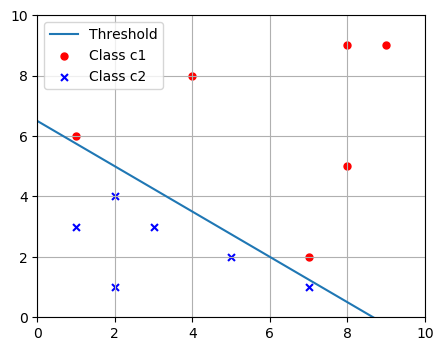

In [258]:
btuPerceptron=calculateWeights(initialWeights,"Threshold",False,None)
#Plotting Data set
plt.figure(num=None, figsize=(5, 4), dpi=100, facecolor='w', edgecolor='k') 
plt.scatter(x1,y1,label="Class c1",color='r',s=25,marker="o")
plt.scatter(x2,y2,label="Class c2",color='b',s=25,marker="x")

#Finding decision buondary for weights acheived through Stochoistic Update
print("Updated Weights : ",btuPerceptron.weights,end=", ")
print("Epochs Taken : ",btuPerceptron.epochsTaken)
y=findDecisionBoundary(btuPerceptron.weights)
plt.plot(x, y,label="Threshold")

plt.xlim((0, 10))
plt.ylim((0, 10))
plt.grid()
plt.legend()

## 2. Perceptron with Widrow-Hoff or Least Mean Squared (LMS) Learning Rule

Updated Weights : [ 3.06455232 -0.29619638 -0.53974422], Epochs Taken :  4999


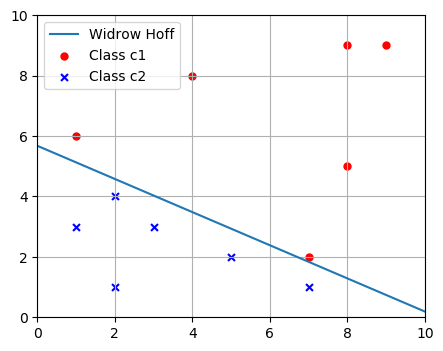

In [259]:
lmsPerceptron=calculateWeights(initialWeights,"LMS",False,None)
# printFunction(lmsPerceptron)
#Plotting Data set
plt.figure(num=None, figsize=(5, 4), dpi=100, facecolor='w', edgecolor='k') 
plt.scatter(x1,y1,label="Class c1",color='r',s=25,marker="o")
plt.scatter(x2,y2,label="Class c2",color='b',s=25,marker="x")

#Finding decision buondary for weights acheived through Stochoistic Update
lmsWeights=lmsPerceptron.weights
print("Updated Weights :",lmsWeights,end=", ")
print("Epochs Taken : ",lmsPerceptron.epochsTaken)
y=findDecisionBoundary(lmsWeights)
plt.plot(x, y,label="Widrow Hoff")

plt.xlim((0, 10))
plt.ylim((0, 10))
plt.grid()
plt.legend()

# 3. Perceptron with Sigmoid Activation Function

Updated Weights : [16.78804273 -1.68632536 -2.86309005],Epochs Taken :  1616


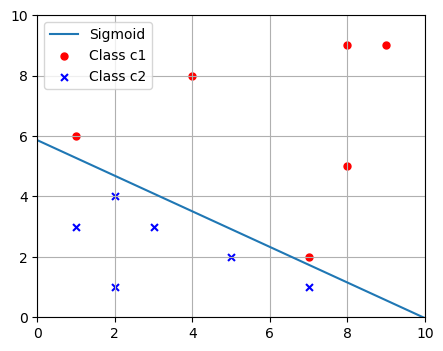

In [260]:
sigPerceptron=calculateWeights(initialWeights,"Sigmoid",False,None)

#Plotting Data set
plt.figure(num=None, figsize=(5, 4), dpi=100, facecolor='w', edgecolor='k') 
plt.scatter(x1,y1,label="Class c1",color='r',s=25,marker="o")
plt.scatter(x2,y2,label="Class c2",color='b',s=25,marker="x")

#Finding decision buondary for weights acheived through Stochoistic Update
sigWeights=sigPerceptron.weights
print("Updated Weights :",sigWeights,end=",")
print("Epochs Taken : ",sigPerceptron.epochsTaken)
y=findDecisionBoundary(sigWeights)
plt.plot(x, y,label="Sigmoid")

plt.xlim((0, 10))
plt.ylim((0, 10))
plt.grid()
plt.legend()


## B. In each case, plot the data points in a graph (e.g. Circle: class-c 1 and Cross: class-c 2 ) and also show the weight vector W * learned from all of the above algorithms in the same graph (labeling clearly to distinguish different solutions).


### Observation:
All the three algorithms have learned to classify the points correctly. It can be seen through graph that the decision boundary is exactly in between the two classes

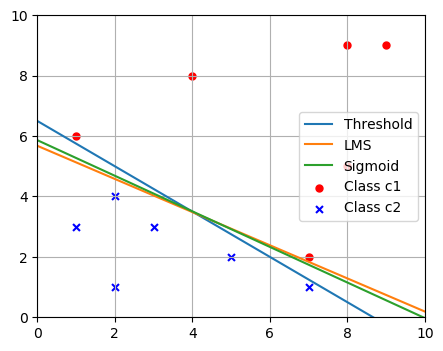

In [261]:
x = np.linspace(0, 20, 2000)
plt.figure(num=None, figsize=(5, 4), dpi=100, facecolor='w', edgecolor='k') 
x1=dataSet[:6,0]
x2=dataSet[6:,0]
y1=dataSet[:6,1]
y2=dataSet[6:,1]

#Plotting Data set
plt.scatter(x1,y1,label="Class c1",color='r',s=25,marker="o")
plt.scatter(x2,y2,label="Class c2",color='b',s=25,marker="x")

#Decision buondary for BTU
btuPerceptron=calculateWeights(initialWeights,"Threshold",False,None)
y=findDecisionBoundary(btuPerceptron.weights)
plt.plot(x, y,label="Threshold")

#Decision buondary for LMS
lmsPerceptron=calculateWeights(initialWeights,"LMS",False,None)
y=findDecisionBoundary(lmsPerceptron.weights)
plt.plot(x, y,label="LMS")

#Decision buondary for Sigmoid
sigPerceptron=calculateWeights(initialWeights,"Sigmoid",False,None)
y=findDecisionBoundary(sigPerceptron.weights)
plt.plot(x, y,label="Sigmoid")
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.grid()
plt.legend()

## C. Create a test set comprising three more data samples (x p ) for each class and test your implementation by computing for each of the test samples the output (class label) predicted by the respective algorithm. Create a comparison table listing test set accuracies of each of the above algorithms.

### Test Data
- class c1: [8,8],[10,8],[6,10]
- class c2: [2,2],[0,0],[4,0]

## Observation:
All the test data is classified correctly. 100% accuracy is achieved in all three algorithms.

In [262]:
btuAccuracy=0
lmsAccuracy=0
sigAccuracy=0
test=np.array([[2,2],[0,0],[4,0],[8,8],[10,8],[6,10]])
len=test.shape[0]
def getClass(val):
    return "c2" if val>=0.5 else "c1"

def cal(operation):
    global initialWeights,initialBatchWeights
    if operation =="Threshold" or operation =="Sigmoid":
        testTarget=np.array([1,1,1,0,0,0])
    elif operation =="LMS":
        testTarget=np.array([1,1,1,-1,-1,-1])
        
    perceptron=calculateWeights(initialWeights,operation,False,None)
    for i in range(len):
        y = np.insert(test[i], 0, 1)
        clacAccuracy(perceptron.getClass(testTarget[i]),perceptron.getClass(perceptron.prediction(y)),operation,"Stoch")
    return perceptron


def clacAccuracy(targetVal,predictedVal,func,op):
    if targetVal==predictedVal:
      
        if func=="Threshold" and op=="Stoch":
            global btuAccuracy
            btuAccuracy+=1
        elif func=="LMS" and op=="Stoch":
            global lmsAccuracy
            lmsAccuracy+=1
        elif func=="Sigmoid" and op=="Stoch":
            global sigAccuracy
            sigAccuracy+=1
def printAccuracy():
    print("System","Accuracy",sep="\t\t\t")
    print("-------------------------------")
    print("BTU",str((btuAccuracy/len)*100)+"%",sep="\t\t\t")
    print("LMS",str((lmsAccuracy/len)*100)+"%",sep="\t\t\t")
    print("Sigmoid",str((sigAccuracy/len)*100)+"%",sep="\t\t\t")
    
cal("Threshold")
cal("LMS")
cal("Sigmoid")
printAccuracy()


System			Accuracy
-------------------------------
BTU			100.0%
LMS			100.0%
Sigmoid			100.0%


## D. Run each of the above algorithms for various initial values of the weight vector, and comment on the dependence of convergence time (run-time) on initialization.

Here we are using below 5 weights against each of the implemented algorithm.
- w1 = [.5,.5,.5]
- w2 = [-10,-10,-10]
- w3 = [-25,-25,-25]
- w4 = [50,50,50]

## Observations:

***1) Threshold and Sigmoid: ***

-ve weighhts  => slower convergence ,

+ve weights are increased => faster convergence

***2) LMS :***

This is running through out the epochs. For larger weights converging faster.

- It is observed that in weights of same amgnitute but different sign the +ve weihgts converge faster than -ve weights


In [263]:
w1=np.array([.5,.5,.5])
w2=np.array([-10,-10,-10])
w3=np.array([-25,-25,-25])
w4=np.array([25,25,25])
weights=[w1,w2,w3,w4]

operations=["Threshold","LMS","Sigmoid"]
print("Weights\t\tSystem\tStoch\tEpochs")
print("--------------------------------------")
for i in operations:
    calculateWeights(initialWeights,i,True,None)
    for j in weights:
        calculateWeights(j,i,True,None)


Weights		System	Stoch	Epochs
--------------------------------------
[0 0 0]		BTU	0.032	45
[0.5 0.5 0.5]	BTU	0.019	36
[-10 -10 -10]	BTU	0.024	50
[-25 -25 -25]	BTU	0.020	45
[25 25 25]	BTU	0.010	19
[0 0 0]		LMS	2.182	4999
[0.5 0.5 0.5]	LMS	2.118	4999
[-10 -10 -10]	LMS	2.294	4999
[-25 -25 -25]	LMS	2.513	4999
[25 25 25]	LMS	0.263	440
[0 0 0]		Sigmoid	0.831	1616
[0.5 0.5 0.5]	Sigmoid	0.839	1609
[-10 -10 -10]	Sigmoid	0.859	1687
[-25 -25 -25]	Sigmoid	0.854	1768
[25 25 25]	Sigmoid	0.014	28


### F. Modify the dataset such that it becomes linearly non-separable (clearly list the changes in the report). You know that algorithm (1) will fail to converge for this dataset. Now run algorithms (2) and (3) with suitable stopping criteria. Plot the data points in a graph (e.g.Circle: class- c 1 and Cross: class- c 2 ) and also show the weight vector W * learned from these two algorithms in the same graph (labeling clearly to distinguish different solutions) andcomment on the nature of the solution found in each case.

Half of the vectors in c1 are moved to c2 and vice versa. Datasets formed are:

1) class c1: [2, 1],[7, 2],[2, 4],[9, 9],[1, 3],[8, 5]

2) calss c2: [1, 6],[3, 3],[8, 9],[7, 1],[4, 8],[5, 2]


**Stopping Criteria:**
- <i><u>LMS:</u></i> The mean squared error should be <=0.45
- <i><u>Sigmoid:</u></i> The absolute mean error should be <=0.05

## Observations
   - It is observed that the decision boundary is between the midpoints dividing the ponts equally such that there is 50% accuracy.
   - The slope of decision boundary is +ve in Non Linear case but in Linear seperable data the decision boundary slope was -ve
   - The learning rates are kept sufficently small so that the learning takes place at a slower rate when compared to that of Linear Seperable data.
       - LMS: $\eta = 0.0001$
       - Sigmoid: $\eta = 0.001$

LMS : Epochs Taken : 4861 : Updated Wieghts : [ 0.16696455  0.04930653 -0.09443461]
Sigmoid : Epochs Taken : 1603 : Updated Wieghts : [ 0.16189511  0.08183828 -0.11505885]


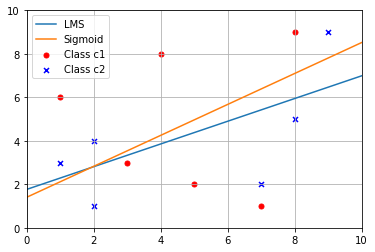

In [264]:
originalTarget=target
originalDataSet=dataSet
dataSet = np.array([[1, 6],[3, 3],[8, 9],[7, 1],[4, 8],[5, 2],[2, 1],[7, 2],[2, 4],[9, 9],[1, 3],[8, 5]])
m1=dataSet[:6,0]
m2=dataSet[6:,0]
l1=dataSet[:6,1]
l2=dataSet[6:,1]
plt.scatter(m1,l1,label="Class c1",color='r',s=25,marker="o")
plt.scatter(m2,l2,label="Class c2",color='b',s=25,marker="x")

lmsPerceptron=calculateWeights(initialWeights,"LMS",False,"Non Linear")
# print(lmsPerceptron.weights)

y=findDecisionBoundary(lmsPerceptron.weights)
plt.plot(x,y,label="LMS")

sigPerceptron=calculateWeights(initialWeights,"Sigmoid",False,"Non Linear")
# print(sigPerceptron.weights)
y=findDecisionBoundary(sigPerceptron.weights)
plt.plot(x,y,label="Sigmoid")
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.grid()
plt.legend()

target=originalTarget
dataSet=originalDataSet